In [1]:
import os
import joblib

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
%matplotlib inline


from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.svm import SVR
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import RidgeCV, Ridge
from sklearn.ensemble import IsolationForest


In [2]:
housing = pd.read_csv("home-data-for-ml-course/train.csv")
housing_test = pd.read_csv("home-data-for-ml-course/test.csv")


In [3]:
housing.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [4]:
non_null_columns = housing.columns[housing.isnull().sum() == 0]

In [5]:
housing[non_null_columns].dtypes

Id                int64
MSSubClass        int64
MSZoning         object
LotArea           int64
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
OverallQual       int64
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
ExterQual        object
ExterCond        object
Foundation       object
BsmtFinSF1        int64
BsmtFinSF2        int64
BsmtUnfSF         int64
TotalBsmtSF       int64
Heating          object
HeatingQC        object
CentralAir       object
1stFlrSF          int64
2ndFlrSF          int64
LowQualFinSF      int64
GrLivArea         int64
BsmtFullBath      int64
BsmtHalfBath      int64
FullBath          int64
HalfBath          int64
BedroomAbvGr    

In [6]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
from sklearn.model_selection import train_test_split
x_train, x_val = train_test_split(housing, test_size=0.25, random_state=0, shuffle=True, stratify=housing["MSSubClass"])

In [8]:
housing = x_train

In [9]:
housing

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1226,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,6,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,74.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0,Unf,0,894,894,GasA,Ex,Y,SBrkr,894,1039,0,1933,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2007.0,Fin,3,668,TA,TA,Y,100,18,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal,214000
556,557,20,RL,69.0,14850,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1957,1957,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,895,Unf,0,197,1092,GasA,TA,Y,FuseA,1092,0,0,1092,1,0,1,0,2,1,TA,6,Typ,1,TA,Attchd,1957.0,Fin,1,299,TA,TA,Y,268,0,0,0,122,0,NaN,MnWw,NaN,0,5,2006,WD,Normal,141000
250,251,30,RL,55.0,5350,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1Story,3,2,1940,1966,Gable,CompShg,Wd Sdng,Plywood,NaN,0.0,TA,Po,CBlock,TA,TA,No,Unf,0,Unf,0,728,728,GasA,Ex,Y,SBrkr,1306,0,0,1306,0,0,1,0,3,1,Fa,6,Mod,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,263,0,0,0,0,0,NaN,GdWo,Shed,450,5,2010,WD,Normal,76500
1095,1096,20,RL,78.0,9317,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,6,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,24,Unf,0,1290,1314,GasA,Gd,Y,SBrkr,1314,0,0,1314,0,0,2,0,3,1,Gd,6,Typ,1,Gd,Attchd,2006.0,RFn,2,440,TA,TA,Y,0,22,0,0,0,0,NaN,NaN,NaN,0,3,2007,WD,Normal,176432
334,335,60,RL,59.0,9042,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1998,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,Gd,GLQ,828,Unf,0,115,943,GasA,Gd,Y,SBrkr,943,695,0,1638,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1998.0,Fin,2,472,TA,TA,Y,100,38,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal,192000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,713,120,RL,40.0,4671,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1988,1989,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,767,Unf,0,461,1228,GasA,Gd,Y,SBrkr,1228,0,0,1228,1,0,2,0,2,1,Gd,5,Typ,1,Gd,Attchd,1988.0,Fin,2,472,TA,TA,Y,168,120,0,0,0,0,NaN,NaN,NaN,0,10,2008,WD,Normal,189000
68,69,30,RM,47.0,4608,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Artery,Norm,1Fam,1Story,4,6,1945,1950,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,Gd,CBlock,TA,TA,No,Unf,0,Unf,0,747,747,GasA,TA,Y,SBrkr,747,0,0,747,0,0,1,0,2,1,TA,4,Typ,0,NaN,Attchd,1945.0,Unf,1,220,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,80000
713,714,190,RL,60.0,9873,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,RRAn,Norm,2fmCon,1Story,4,5,1970,1970,Gable,CompShg,HdBoard,HdBoard,BrkFace,160.0,TA,TA,CBlock,TA,TA,Av,ALQ,789,Unf,0,171,960,GasW,TA,N,SBrkr,960,0,0,960,1,0,1,0,3,1,TA,6,Typ,0,NaN,Detchd,1970.0,Unf,2,576,TA,TA,Y,0,288,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,129000
72,73,60,RL,74.0,10141,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,40.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,832,832,GasA,Gd,Y,SB

In [10]:
len(non_null_columns)

62

In [11]:
numeric_cols = list(housing[non_null_columns].select_dtypes(include=np.number).columns)
numeric_cols.remove("SalePrice")
cat_cols = list(housing[non_null_columns].select_dtypes(include='object').columns)

In [12]:
len(numeric_cols)

34

In [13]:
housing[numeric_cols]

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
1226,1227,60,14598,6,5,2007,2007,0,0,894,894,894,1039,0,1933,0,0,2,1,4,1,9,1,3,668,100,18,0,0,0,0,0,1,2008
556,557,20,14850,5,5,1957,1957,895,0,197,1092,1092,0,0,1092,1,0,1,0,2,1,6,1,1,299,268,0,0,0,122,0,0,5,2006
250,251,30,5350,3,2,1940,1966,0,0,728,728,1306,0,0,1306,0,0,1,0,3,1,6,0,0,0,263,0,0,0,0,0,450,5,2010
1095,1096,20,9317,6,5,2006,2006,24,0,1290,1314,1314,0,0,1314,0,0,2,0,3,1,6,1,2,440,0,22,0,0,0,0,0,3,2007
334,335,60,9042,6,5,1998,1998,828,0,115,943,943,695,0,1638,1,0,2,1,3,1,7,2,2,472,100,38,0,0,0,0,0,7,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,713,120,4671,8,5,1988,1989,767,0,461,1228,1228,0,0,1228,1,0,2,0,2,1,5,1,2,472,168,120,0,0,0,0,0,10,2008
68,69,30,4608,4,6,1945,1950,0,0,747,747,747,0,0,747,0,0,1,0,2,1,4,0,1,220,0,0,0,0,0,0,0,6,2010
713,714,190,9873,4,5,1970,1970,789,0,171,960,960,0,0,960,1,0,1,0,3,1,6,0,2,576,0,288,0,0,0,0,0,5,2006
72,73,60,10141,7,5,1998,1998,0,0,832,832,885,833,0,1718,0,0,2,1,3,1,7,1,2,427,0,94,0,0,291,0,0,12,2009


In [14]:
housing[numeric_cols + ["SalePrice"]].corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.779178
GrLivArea        0.700960
GarageCars       0.625613
TotalBsmtSF      0.603408
GarageArea       0.599505
1stFlrSF         0.599397
FullBath         0.545963
TotRmsAbvGrd     0.529514
YearBuilt        0.504387
YearRemodAdd     0.487619
Fireplaces       0.469191
BsmtFinSF1       0.395380
2ndFlrSF         0.322872
WoodDeckSF       0.299375
OpenPorchSF      0.285439
HalfBath         0.284542
LotArea          0.268042
BsmtFullBath     0.241044
BsmtUnfSF        0.191740
BedroomAbvGr     0.163348
ScreenPorch      0.126158
PoolArea         0.116154
3SsnPorch        0.046494
MoSold           0.014467
BsmtFinSF2       0.005589
Id              -0.011467
LowQualFinSF    -0.011493
BsmtHalfBath    -0.011534
MiscVal         -0.018451
YrSold          -0.026597
OverallCond     -0.074484
MSSubClass      -0.093661
EnclosedPorch   -0.101778
KitchenAbvGr    -0.128877
Name: SalePrice, dtype: float64

<Axes: xlabel='OverallQual', ylabel='Count'>

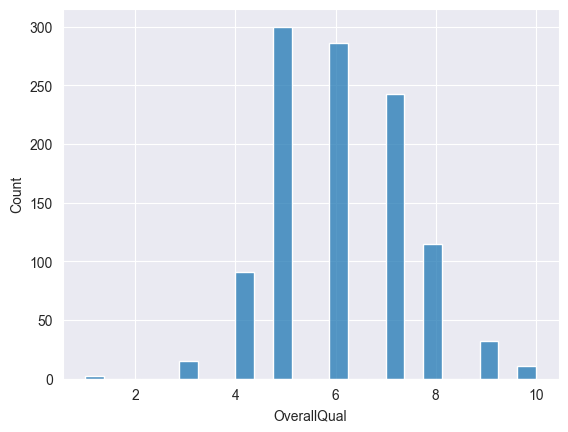

In [15]:
sns.histplot(housing['OverallQual'])

<Axes: xlabel='GrLivArea', ylabel='Count'>

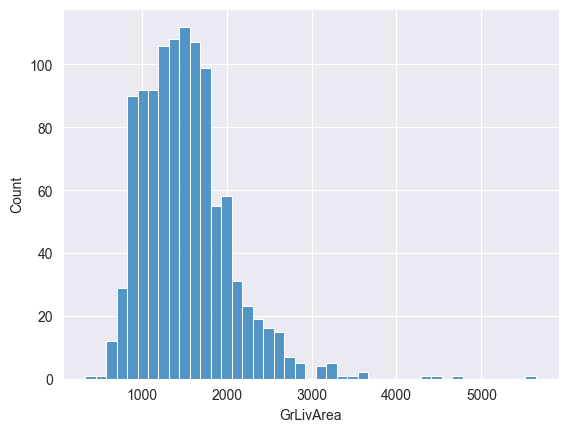

In [16]:
sns.histplot(data=housing, x="GrLivArea")

In [17]:
def save_plot(name, type='png', tight=True):
  os.makedirs("./plots", exist_ok=True)
  fname=f"plots/{name}.{type}"
  if tight:
    plt.tight_layout()
  print(f"Saving to {fname}")
  plt.savefig(fname)
  

In [18]:
from sklearn.preprocessing import StandardScaler
def plot_features_eda(df, feat_cols, standardize, name):
  housing = df.copy()
  m_cols = 4 if standardize else 2
  m_rows = m_cols
  if standardize:
    stdz_cols = [ c + "_standz" for c in feat_cols]
    ss = StandardScaler()
    ss.fit(housing[feat_cols])
    housing[stdz_cols] = ss.transform(housing[feat_cols])
  for iter_id, feat_subset in enumerate(zip(*(iter(feat_cols),) * (m_rows))):
    fig = plt.figure(figsize=(6*m_rows, 4*m_cols))
    for i, feat in enumerate(feat_subset):
      if feat is None:
        continue
      idx = 4*i if standardize else 2*i
      ax = fig.add_subplot(m_rows, m_cols, idx+1)
      sns.scatterplot(data=housing, y="SalePrice", x = feat, alpha=0.6, ax=ax)
      ax = fig.add_subplot(m_rows, m_cols, idx+2)
      sns.histplot(data=housing, x = feat, alpha=0.6, ax=ax)
      if standardize:
        feat_stdz = f"{feat}_standz"
        ax = fig.add_subplot(m_rows, m_cols, idx+3)
        sns.scatterplot(data=housing, y="SalePrice", x = feat_stdz, alpha=0.6, ax=ax)
        ax = fig.add_subplot(m_rows, m_cols, idx+4)
        sns.histplot(data=housing, x = feat_stdz , alpha=0.6, ax=ax)
    save_plot(f"{name}_{iter_id}")
    plt.show()
    plt.close()

Saving to plots/eda_numeric_features__0.png


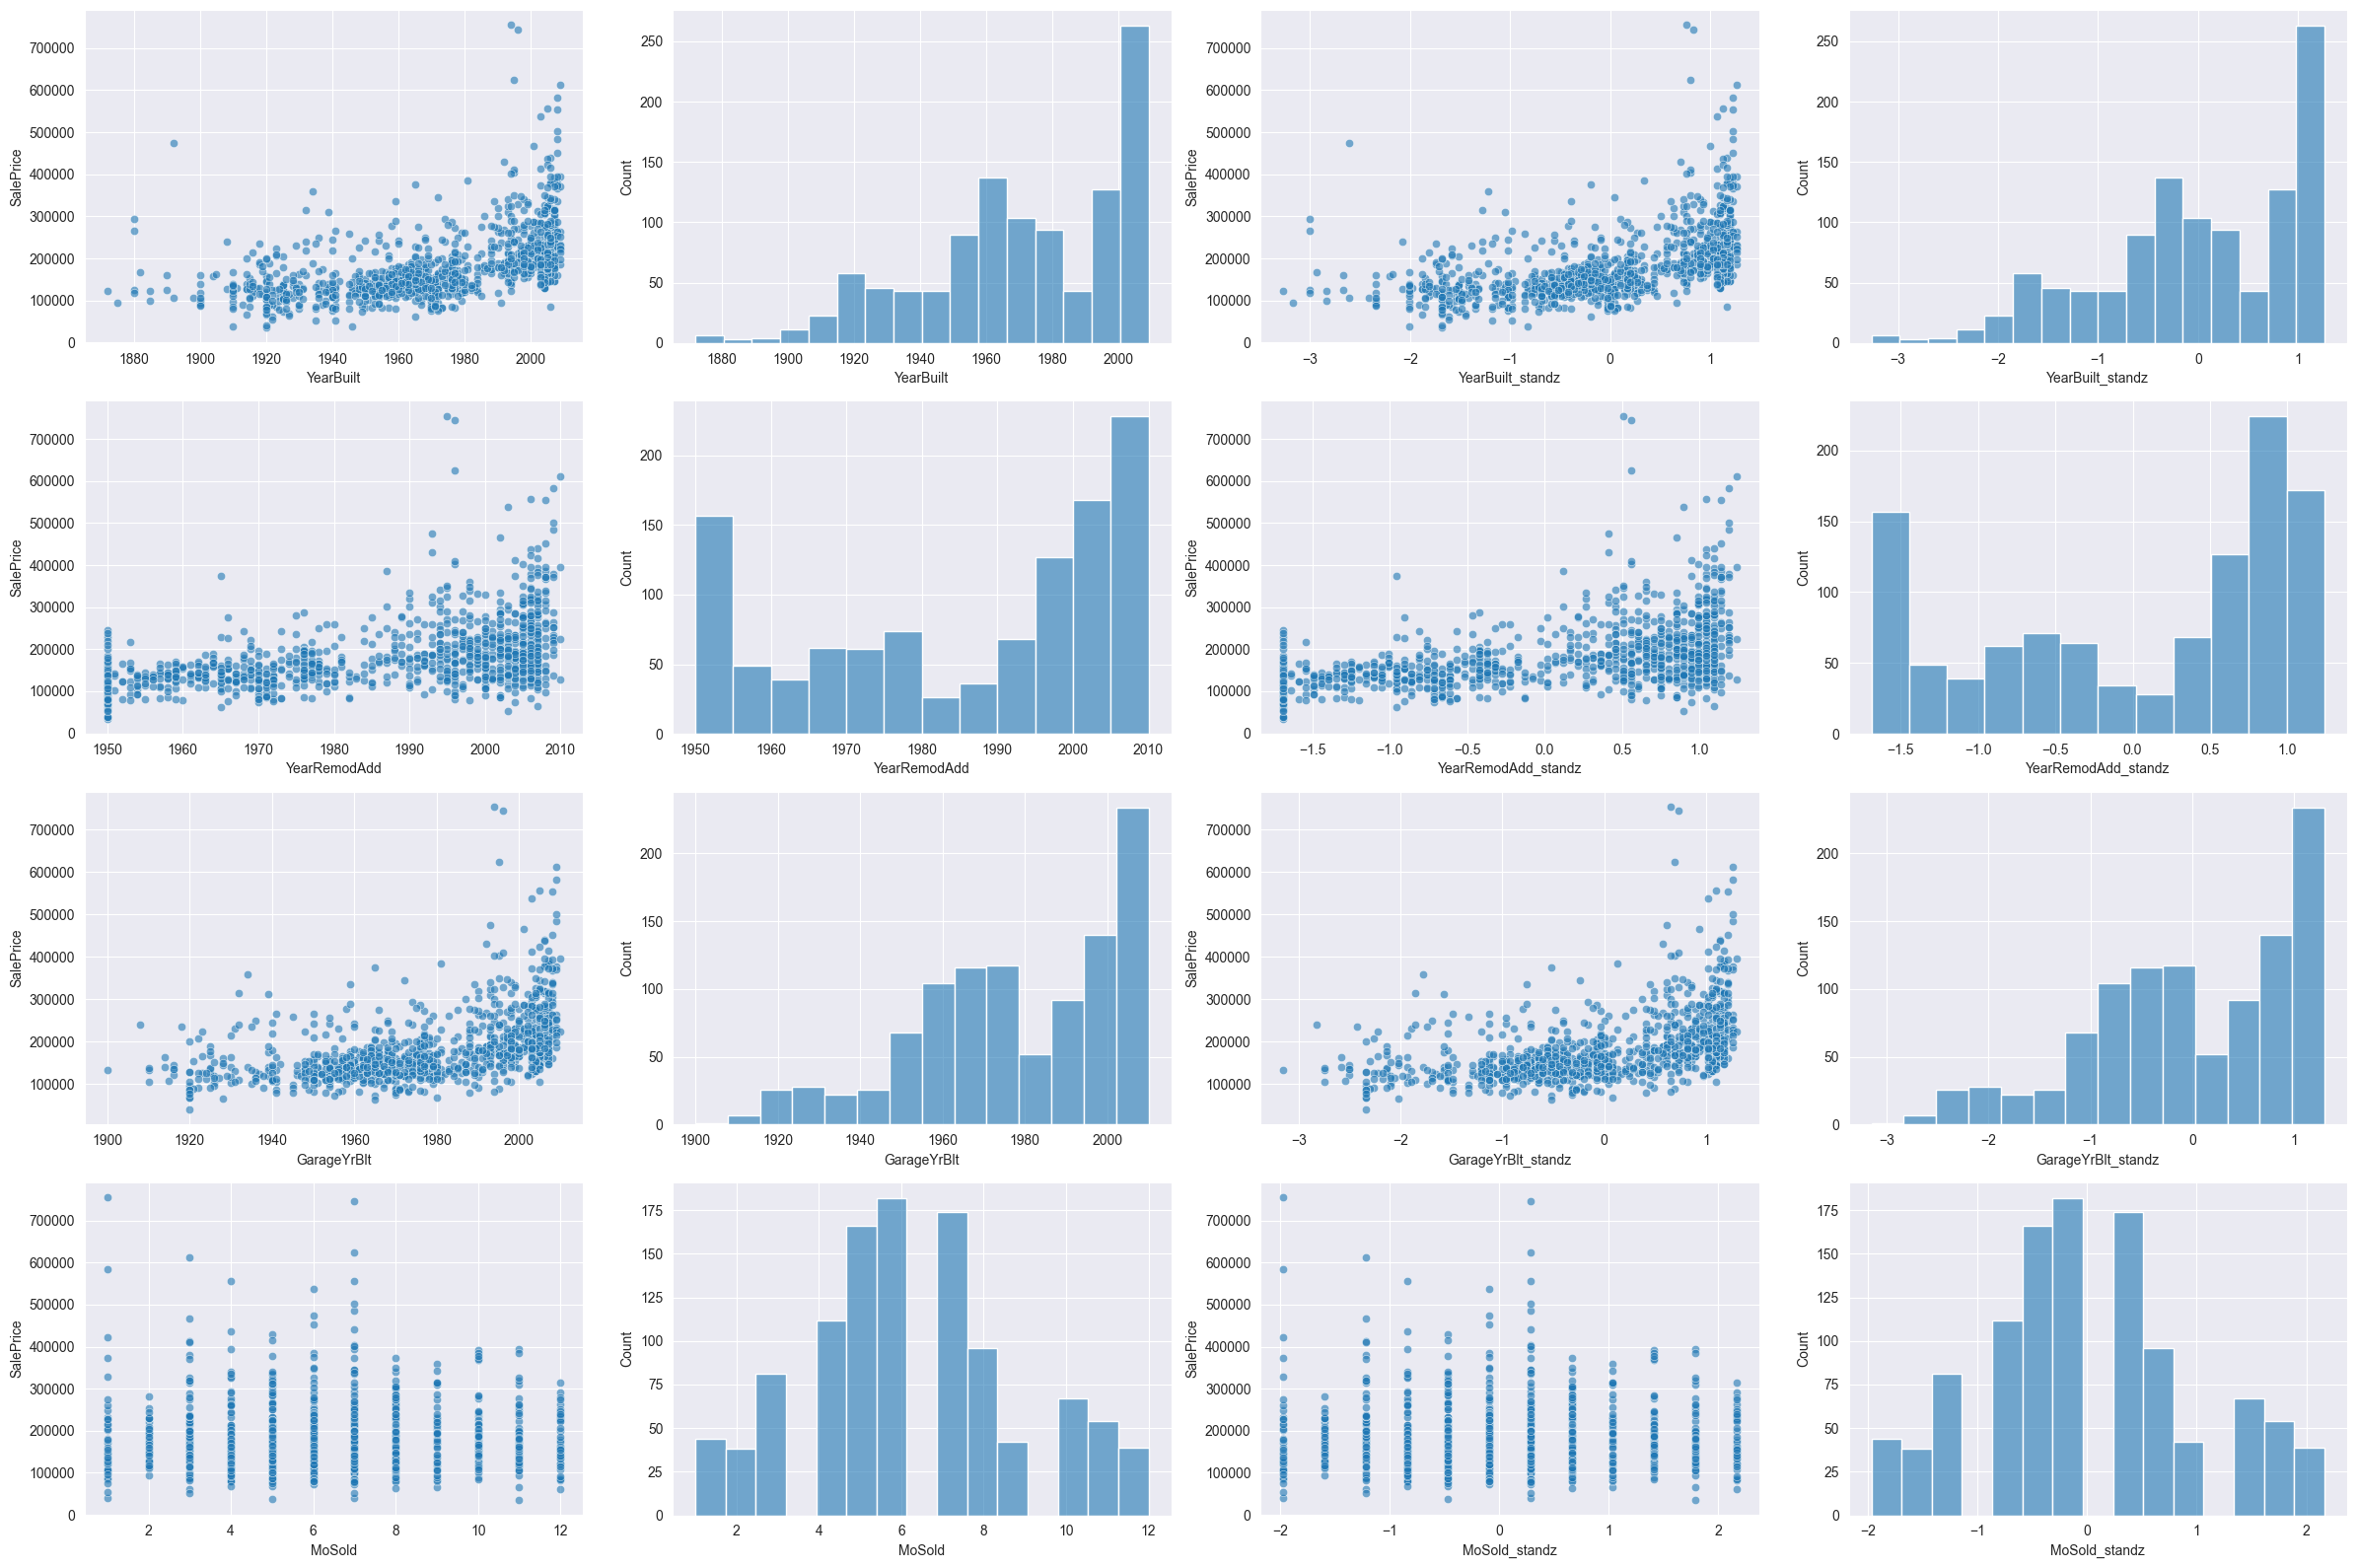

In [19]:
plot_features_eda(housing, [c for c in housing.columns if ("Year" in c or "Yr" in c or "Sold" in c)], True, "eda_numeric_features_")

In [20]:
cont_features = [c for c in housing.columns if len(housing[c].unique()) > 30 ]
cont_features.remove("SalePrice")
cont_features.remove("Id")
cont_features.append("PoolArea")
cont_features.append("MiscVal")
cont_features,len(cont_features)
ord_features = [c for c in numeric_cols if len(housing[c].unique()) < 30 ]
ord_features.remove("PoolArea")
ord_features.remove("MiscVal")
cont_features

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

In [21]:
cont_feat_long_tail = ['LotFrontage',
 'LotArea','MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'PoolArea']
cont_features = list(set(cont_features) - set(cont_feat_long_tail))

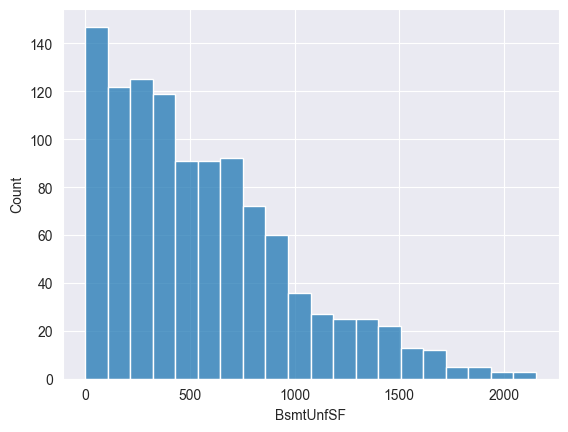

<Axes: xlabel='BsmtUnfSF', ylabel='Count'>

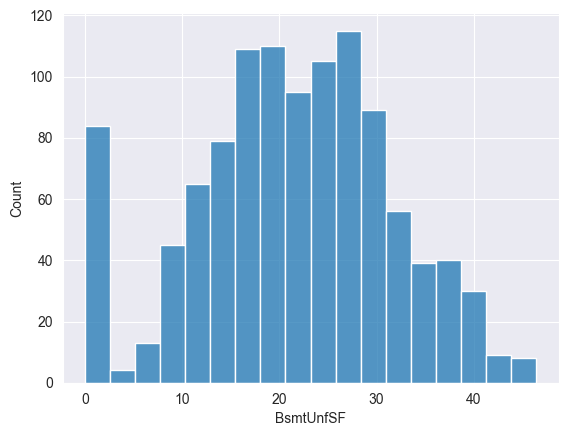

In [22]:
sns.histplot(data=housing, x="BsmtUnfSF")
plt.show()
sns.histplot(np.sqrt(housing["BsmtUnfSF"]))


In [23]:
# plot_features_eda(housing, cont_features, True, "eda_continous_features_")

In [24]:
# plot_features_eda(housing, cont_feat_long_tail, False, "eda_continous_features_")

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [26]:
from sklearn.utils.validation import check_array, check_is_fitted
from sklearn.base import BaseEstimator, TransformerMixin
class MultiColumnLabelEncoder(BaseEstimator, TransformerMixin):
  def __init__(self):
    self.label_encoders = {}
  
  def fit(self, X, y=None):
    self.feature_names_in_ = list(X.columns)
    self.n_features_in_ = len(self.feature_names_in_)
    for c in X.columns:
      le = LabelEncoder()
      self.label_encoders[c] = le.fit(X[c])
    return self
  
  def transform(self, X):
    check_is_fitted(self)
    assert(list(X.columns) == self.feature_names_in_)
    output = X.copy()
    for c in output.columns:
      le = self.label_encoders[c] 
      output[c] = le.transform(output[c])
    return output
  
  def inverse_transform(self, X):
    check_is_fitted(self)
    assert(list(X.columns) == self.feature_names_in_)
    output = X.copy()
    for c in output.columns:
      le = self.label_encoders[c] 
      output[c] = le.inverse_transform(output[c])
    return output
  
  def fit_transform(self,X,y=None):
    return self.fit(X,y).transform(X)

  def get_feature_names_out(self, names=None):
    return self.feature_names_in_
  
from sklearn.preprocessing import FunctionTransformer
log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_sale_price = log_transformer.transform(housing[["SalePrice"]])
sqrt_transformer = FunctionTransformer(np.sqrt, inverse_func=np.square, validate=False)

In [27]:
cont_feat_long_tail, cont_features

(['LotFrontage',
  'LotArea',
  'MasVnrArea',
  'BsmtFinSF1',
  'BsmtFinSF2',
  'BsmtUnfSF',
  'TotalBsmtSF',
  '1stFlrSF',
  '2ndFlrSF',
  'WoodDeckSF',
  'OpenPorchSF',
  'EnclosedPorch',
  'ScreenPorch',
  'PoolArea'],
 ['GarageArea',
  'YearBuilt',
  'YearRemodAdd',
  'MiscVal',
  'GrLivArea',
  'GarageYrBlt'])

In [28]:
cont_pipeline = Pipeline([
  ("impute", SimpleImputer(strategy="median")),
  ("standardize", StandardScaler()),
]).set_output(transform="pandas")

sqrt_pipeline = Pipeline([
  ("sqrt_xform", sqrt_transformer),
  ("impute", SimpleImputer(strategy="median")),
  ("standardize", StandardScaler()),
]).set_output(transform="pandas")

continous_feat_pipeline = ColumnTransformer([
  ("cont", cont_pipeline, cont_features),
  ("sqrt", sqrt_pipeline, cont_feat_long_tail),
]).set_output(transform="pandas")

C:\Users\coolv\anaconda3\envs\tf\lib\site-packages\sklearn\preprocessing\_function_transformer.py:345: UserWarning: With transform="pandas", `func` should return a DataFrame to follow the set_output API.
  warnings.warn(


In [29]:
isolation_forest = IsolationForest(contamination=0.02)
cont_prepared = continous_feat_pipeline.fit_transform(housing)
outlier_pred = isolation_forest.fit_predict(cont_prepared)
print("Before outlier removal: ", len(housing))
housing = housing.iloc[outlier_pred == 1]
print("After outlier removal: ", len(housing))
y=housing["SalePrice"] - housing["MiscVal"]
y_val = x_val["SalePrice"] - x_val["MiscVal"]
y

Before outlier removal:  1095
After outlier removal:  1073


C:\Users\coolv\anaconda3\envs\tf\lib\site-packages\sklearn\preprocessing\_function_transformer.py:190: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(


1226    214000
556     141000
250      76050
1095    176432
334     192000
         ...  
712     189000
68       80000
713     129000
72      185000
593     140000
Length: 1073, dtype: int64

In [30]:
cont_prepared = continous_feat_pipeline.fit_transform(housing)
cont_prepared_val = continous_feat_pipeline.transform(x_val)

C:\Users\coolv\anaconda3\envs\tf\lib\site-packages\sklearn\preprocessing\_function_transformer.py:190: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(


<Axes: xlabel='SalePrice', ylabel='Count'>

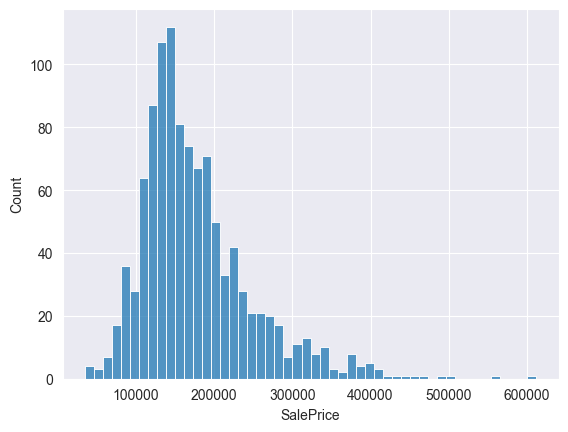

In [31]:
sns.histplot(data= housing, x="SalePrice", bins=50)


<Axes: xlabel='SalePrice', ylabel='Count'>

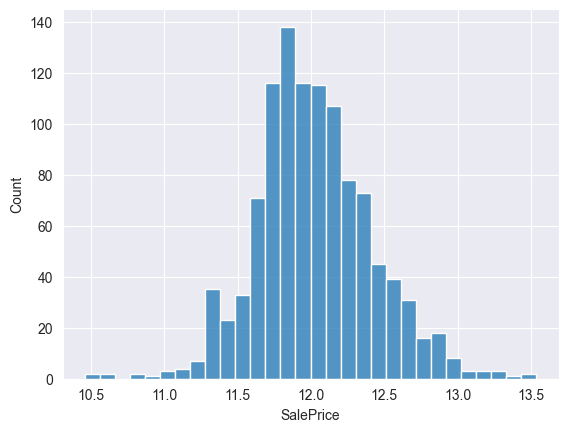

In [32]:
sns.histplot(data=log_sale_price, x="SalePrice", bins=30)

In [33]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score, mean_squared_log_error
global_results = pd.DataFrame()
eval_metrics = [
  ("mae",mean_absolute_error),
  ("mse", mean_squared_error),
  ("mape", mean_absolute_percentage_error),
  ("msle", mean_squared_log_error),
  ("r2_score", r2_score),
]
def evaluate_model(model, X, y, t="training"):
  results = {}
  global global_results
  y_pred = model.predict(X)
  for k,f in eval_metrics:
    res = f(y, y_pred)
    if k == "mape":
      results[k] = np.round(100 * res, 4)
    elif k== "mse":
      results["rmse"] = np.round(np.sqrt(res), 4)
    else:
      results[k] = np.round(res, 4)
  res = pd.Series(results).to_frame().T
  res.index = [type(model.regressor).__name__]
  res["type"] = t
  global_results = pd.concat([global_results, res])
  return res

In [34]:

model = TransformedTargetRegressor(LinearRegression(), transformer=log_transformer)
model.fit(cont_prepared, y)
display(evaluate_model(model, cont_prepared, y, "training"))
display(evaluate_model(model, cont_prepared_val, y_val, "validation"))

,mae,rmse,mape,msle,r2_score,type
LinearRegression,18430.7789,28126.9981,10.9726,0.0233,0.8485,training


,mae,rmse,mape,msle,r2_score,type
LinearRegression,19355.5103,28294.9782,11.5426,0.0247,0.8595,validation


In [35]:
model.score(cont_prepared, y)

0.8485348097972298

In [36]:
model.predict(cont_prepared.iloc[:5])

array([231049.76646127, 140204.50376882, 100828.71063062, 180877.81496974,
       201934.52237842])

In [37]:
model.regressor_.coef_

array([ 0.05345061,  0.11677377,  0.07494664,  0.00099187,  0.07899346,
       -0.02850185,  0.01343537,  0.03160254,  0.00658222,  0.03749454,
        0.0024524 , -0.0004332 ,  0.05732045,  0.07577905,  0.07370543,
        0.01818706,  0.01219997,  0.01835026,  0.0242472 ,  0.00515642])

In [38]:
housing[ord_features].isna().sum()

MSSubClass      0
OverallQual     0
OverallCond     0
LowQualFinSF    0
BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
TotRmsAbvGrd    0
Fireplaces      0
GarageCars      0
3SsnPorch       0
MoSold          0
YrSold          0
dtype: int64

In [39]:
ord_pipeline = Pipeline([
  ("imputer", SimpleImputer(strategy="most_frequent").set_output(transform="pandas")),
  ("scaler", StandardScaler().set_output(transform="pandas")),
])
ord_prepared = ord_pipeline.fit_transform(housing[ord_features])
ord_prepared_val = ord_pipeline.fit_transform(x_val[ord_features])
ord_prepared.head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,MoSold,YrSold
1226,0.075122,-0.026108,-0.522995,-0.110144,-0.826681,-0.239573,0.841735,1.226122,1.402584,-0.214722,1.617685,0.635647,1.668823,-0.114517,-1.972802,0.152171
556,-0.867638,-0.783253,-0.522995,-0.110144,1.093294,-0.239573,-1.012847,-0.767255,-1.056521,-0.214722,-0.305968,0.635647,-1.015805,-0.114517,-0.464829,-1.338965
250,-0.631948,-2.297543,-3.238349,-0.110144,-0.826681,-0.239573,-1.012847,-0.767255,0.173031,-0.214722,-0.305968,-0.935894,-2.358119,-0.114517,-0.464829,1.643307
1095,-0.867638,-0.026108,-0.522995,-0.110144,-0.826681,-0.239573,0.841735,-0.767255,0.173031,-0.214722,-0.305968,0.635647,0.326509,-0.114517,-1.218816,-0.593397
334,0.075122,-0.026108,-0.522995,-0.110144,1.093294,-0.239573,0.841735,1.226122,0.173031,-0.214722,0.335250,2.207188,0.326509,-0.114517,0.289157,0.152171


In [40]:
preprocessing = ColumnTransformer([
  ("cont", cont_pipeline, cont_features),
  ("sqrt", sqrt_pipeline, cont_feat_long_tail),
  ("ord", ord_pipeline, ord_features),
]).set_output(transform="pandas")

C:\Users\coolv\anaconda3\envs\tf\lib\site-packages\sklearn\preprocessing\_function_transformer.py:345: UserWarning: With transform="pandas", `func` should return a DataFrame to follow the set_output API.
  warnings.warn(


In [41]:
prep_housing = preprocessing.fit_transform(housing)
prep_housing_val = preprocessing.transform(x_val)
prep_housing.isna().sum()

C:\Users\coolv\anaconda3\envs\tf\lib\site-packages\sklearn\preprocessing\_function_transformer.py:190: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(


cont__GarageArea       0
cont__YearBuilt        0
cont__YearRemodAdd     0
cont__MiscVal          0
cont__GrLivArea        0
cont__GarageYrBlt      0
sqrt__LotFrontage      0
sqrt__LotArea          0
sqrt__MasVnrArea       0
sqrt__BsmtFinSF1       0
sqrt__BsmtFinSF2       0
sqrt__BsmtUnfSF        0
sqrt__TotalBsmtSF      0
sqrt__1stFlrSF         0
sqrt__2ndFlrSF         0
sqrt__WoodDeckSF       0
sqrt__OpenPorchSF      0
sqrt__EnclosedPorch    0
sqrt__ScreenPorch      0
sqrt__PoolArea         0
ord__MSSubClass        0
ord__OverallQual       0
ord__OverallCond       0
ord__LowQualFinSF      0
ord__BsmtFullBath      0
ord__BsmtHalfBath      0
ord__FullBath          0
ord__HalfBath          0
ord__BedroomAbvGr      0
ord__KitchenAbvGr      0
ord__TotRmsAbvGrd      0
ord__Fireplaces        0
ord__GarageCars        0
ord__3SsnPorch         0
ord__MoSold            0
ord__YrSold            0
dtype: int64

In [42]:
model1 = TransformedTargetRegressor(LinearRegression(), transformer=log_transformer)
model1.fit(prep_housing, y)
display(evaluate_model(model1, prep_housing, y, "training"))
display(evaluate_model(model1, prep_housing_val, y_val, "validation"))

,mae,rmse,mape,msle,r2_score,type
LinearRegression,15007.708,22441.2376,8.7921,0.0148,0.9036,training


,mae,rmse,mape,msle,r2_score,type
LinearRegression,15229.3046,21808.4826,9.2194,0.0165,0.9165,validation


In [43]:
display(housing[cat_cols].head())
labeled_ordered_cols = [ c for c in cat_cols if ("Qual" in c or "QC" in c or c.endswith("Cond"))]
display(housing[labeled_ordered_cols].head())
labeled_cat_cols = [ c for c in cat_cols if not ("Qual" in c or "QC" in c or c.endswith("Cond"))]
display(housing[labeled_cat_cols].head())                                 

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,Heating,HeatingQC,CentralAir,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition
1226,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
556,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Wd Sdng,Wd Sdng,TA,TA,CBlock,GasA,TA,Y,TA,Typ,Y,WD,Normal
250,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1Story,Gable,CompShg,Wd Sdng,Plywood,TA,Po,CBlock,GasA,Ex,Y,Fa,Mod,Y,WD,Normal
1095,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,GasA,Gd,Y,Gd,Typ,Y,WD,Normal
334,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,TA,TA,PConc,GasA,Gd,Y,TA,Typ,Y,WD,Normal


,ExterQual,ExterCond,HeatingQC,KitchenQual
1226,Gd,TA,Ex,Gd
556,TA,TA,TA,TA
250,TA,Po,Ex,Fa
1095,Gd,TA,Gd,Gd
334,TA,TA,Gd,TA


,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,Foundation,Heating,CentralAir,Functional,PavedDrive,SaleType,SaleCondition
1226,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,PConc,GasA,Y,Typ,Y,WD,Normal
556,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Wd Sdng,Wd Sdng,CBlock,GasA,Y,Typ,Y,WD,Normal
250,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1Story,Gable,CompShg,Wd Sdng,Plywood,CBlock,GasA,Y,Mod,Y,WD,Normal
1095,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,PConc,GasA,Y,Typ,Y,WD,Normal
334,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,PConc,GasA,Y,Typ,Y,WD,Normal


In [44]:
labeled_ord_pipeline = Pipeline([
  ("label_enc", MultiColumnLabelEncoder()),
  ("imputer", SimpleImputer(strategy="most_frequent")),
  ("scaler", StandardScaler())
]).set_output(transform="pandas")
labeled_ord_pipeline.fit_transform(housing[labeled_ordered_cols])


,ExterQual,ExterCond,HeatingQC,KitchenQual
1226,-0.894536,0.363831,-0.924324,-0.453543
556,0.641204,0.363831,1.371508,0.781613
250,0.641204,-1.020532,-0.924324,-1.688699
1095,-0.894536,0.363831,0.223592,-0.453543
334,0.641204,0.363831,0.223592,0.781613
...,...,...,...,...
712,-0.894536,0.363831,0.223592,-0.453543
68,0.641204,-2.404895,1.371508,0.781613
713,0.641204,0.363831,1.371508,0.781613
72,0.641204,0.363831,0.223592,0.781613


In [45]:
labeled_cat_pipeline = Pipeline([
    ("one_hot_enc", OneHotEncoder(handle_unknown="ignore",sparse_output=False)),
    ("imputer", SimpleImputer(strategy="most_frequent")),
]).set_output(transform="pandas")
labeled_cat_pipeline.fit_transform(housing[labeled_cat_cols])

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosN,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,CentralAir_Y,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1226,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
556,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
250,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.

In [46]:
preprocessing_new = ColumnTransformer([
  ("cont", cont_pipeline, cont_features),
  ("sqrt", sqrt_pipeline, cont_feat_long_tail),
  ("ord", ord_pipeline, ord_features),
  ("cat_labeled", labeled_cat_pipeline, labeled_cat_cols),
  ("ord_labeled", labeled_ord_pipeline, labeled_ordered_cols),
]).set_output(transform="pandas")

C:\Users\coolv\anaconda3\envs\tf\lib\site-packages\sklearn\preprocessing\_function_transformer.py:345: UserWarning: With transform="pandas", `func` should return a DataFrame to follow the set_output API.
  warnings.warn(


In [47]:
prep_housing_new = preprocessing_new.fit_transform(housing)
display(prep_housing_new.head())
prep_housing_new_val = preprocessing_new.transform(x_val)
display(prep_housing_new_val.isna().sum())

C:\Users\coolv\anaconda3\envs\tf\lib\site-packages\sklearn\preprocessing\_function_transformer.py:190: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(


,cont__GarageArea,cont__YearBuilt,cont__YearRemodAdd,cont__MiscVal,cont__GrLivArea,cont__GarageYrBlt,sqrt__LotFrontage,sqrt__LotArea,sqrt__MasVnrArea,sqrt__BsmtFinSF1,sqrt__BsmtFinSF2,sqrt__BsmtUnfSF,sqrt__TotalBsmtSF,sqrt__1stFlrSF,sqrt__2ndFlrSF,sqrt__WoodDeckSF,sqrt__OpenPorchSF,sqrt__EnclosedPorch,sqrt__ScreenPorch,sqrt__PoolArea,ord__MSSubClass,ord__OverallQual,ord__OverallCond,ord__LowQualFinSF,ord__BsmtFullBath,ord__BsmtHalfBath,ord__FullBath,ord__HalfBath,ord__BedroomAbvGr,ord__KitchenAbvGr,ord__TotRmsAbvGrd,ord__Fireplaces,ord__GarageCars,ord__3SsnPorch,ord__MoSold,ord__YrSold,cat_labeled__MSZoning_C (all),cat_labeled__MSZoning_FV,cat_labeled__MSZoning_RH,cat_labeled__MSZoning_RL,cat_labeled__MSZoning_RM,cat_labeled__Street_Grvl,cat_labeled__Street_Pave,cat_labeled__LotShape_IR1,cat_labeled__LotShape_IR2,cat_labeled__LotShape_IR3,cat_labeled__LotShape_Reg,cat_labeled__LandContour_Bnk,cat_labeled__LandContour_HLS,cat_labeled__LandContour_Low,cat_labeled__LandContour_Lvl,cat_labeled__Utilities_AllPub,cat_labeled__Utilities_NoSeWa,cat_labeled__LotConfig_Corner,cat_labeled__LotConfig_CulDSac,cat_labeled__LotConfig_FR2,cat_labeled__LotConfig_FR3,cat_labeled__LotConfig_Inside,cat_labeled__LandSlope_Gtl,cat_labeled__LandSlope_Mod,cat_labeled__LandSlope_Sev,cat_labeled__Neighborhood_Blmngtn,cat_labeled__Neighborhood_Blueste,cat_labeled__Neighborhood_BrDale,cat_labeled__Neighborhood_BrkSide,cat_labeled__Neighborhood_ClearCr,cat_labeled__Neighborhood_CollgCr,cat_labeled__Neighborhood_Crawfor,cat_labeled__Neighborhood_Edwards,cat_labeled__Neighborhood_Gilbert,cat_labeled__Neighborhood_IDOTRR,cat_labeled__Neighborhood_MeadowV,cat_labeled__Neighborhood_Mitchel,cat_labeled__Neighborhood_NAmes,cat_labeled__Neighborhood_NPkVill,cat_labeled__Neighborhood_NWAmes,cat_labeled__Neighborhood_NoRidge,cat_labeled__Neighborhood_NridgHt,cat_labeled__Neighborhood_OldTown,cat_labeled__Neighborhood_SWISU,cat_labeled__Neighborhood_Sawyer,cat_labeled__Neighborhood_SawyerW,cat_labeled__Neighborhood_Somerst,cat_labeled__Neighborhood_StoneBr,cat_labeled__Neighborhood_Timber,cat_labeled__Neighborhood_Veenker,cat_labeled__Condition1_Artery,cat_labeled__Condition1_Feedr,cat_labeled__Condition1_Norm,cat_labeled__Condition1_PosA,cat_labeled__Condition1_PosN,cat_labeled__Condition1_RRAe,cat_labeled__Condition1_RRAn,cat_labeled__Condition1_RRNe,cat_labeled__Condition1_RRNn,cat_labeled__Condition2_Artery,cat_labeled__Condition2_Feedr,cat_labeled__Condition2_Norm,cat_labeled__Condition2_PosN,cat_labeled__Condition2_RRAn,cat_labeled__Condition2_RRNn,cat_labeled__BldgType_1Fam,cat_labeled__BldgType_2fmCon,cat_labeled__BldgType_Duplex,cat_labeled__BldgType_Twnhs,cat_labeled__BldgType_TwnhsE,cat_labeled__HouseStyle_1.5Fin,cat_labeled__HouseStyle_1.5Unf,cat_labeled__HouseStyle_1Story,cat_labeled__HouseStyle_2.5Fin,cat_labeled__HouseStyle_2.5Unf,cat_labeled__HouseStyle_2Story,cat_labeled__HouseStyle_SFoyer,cat_labeled__HouseStyle_SLvl,cat_labeled__RoofStyle_Flat,cat_labeled__RoofStyle_Gable,cat_labeled__RoofStyle_Gambrel,cat_labeled__RoofStyle_Hip,cat_labeled__RoofStyle_Mansard,cat_labeled__RoofStyle_Shed,cat_labeled__RoofMatl_CompShg,cat_labeled__RoofMatl_Membran,cat_labeled__RoofMatl_Roll,cat_labeled__RoofMatl_Tar&Grv,cat_labeled__RoofMatl_WdShake,cat_labeled__RoofMatl_WdShngl,cat_labeled__Exterior1st_AsbShng,cat_labeled__Exterior1st_AsphShn,cat_labeled__Exterior1st_BrkComm,cat_labeled__Exterior1st_BrkFace,cat_labeled__Exterior1st_CemntBd,cat_labeled__Exterior1st_HdBoard,cat_labeled__Exterior1st_ImStucc,cat_labeled__Exterior1st_MetalSd,cat_labeled__Exterior1st_Plywood,cat_labeled__Exterior1st_Stone,cat_labeled__Exterior1st_Stucco,cat_labeled__Exterior1st_VinylSd,cat_labeled__Exterior1st_Wd Sdng,cat_labeled__Exterior1st_WdShing,cat_labeled__Exterior2nd_AsbShng,cat_labeled__Exterior2nd_AsphShn,cat_labeled__Exterior2nd_Brk Cmn,cat_labeled__Exterior2nd_BrkFace,cat_labeled__Exterior2nd_CmentBd,cat_labeled__Exterior2nd_HdBoard,cat_labeled__Exterior2nd_ImStucc,cat_labele

cont__GarageArea                      0
cont__YearBuilt                       0
cont__YearRemodAdd                    0
cont__MiscVal                         0
cont__GrLivArea                       0
cont__GarageYrBlt                     0
sqrt__LotFrontage                     0
sqrt__LotArea                         0
sqrt__MasVnrArea                      0
sqrt__BsmtFinSF1                      0
sqrt__BsmtFinSF2                      0
sqrt__BsmtUnfSF                       0
sqrt__TotalBsmtSF                     0
sqrt__1stFlrSF                        0
sqrt__2ndFlrSF                        0
sqrt__WoodDeckSF                      0
sqrt__OpenPorchSF                     0
sqrt__EnclosedPorch                   0
sqrt__ScreenPorch                     0
sqrt__PoolArea                        0
ord__MSSubClass                       0
ord__OverallQual                      0
ord__OverallCond                      0
ord__LowQualFinSF                     0
ord__BsmtFullBath                     0


In [48]:
model2 = TransformedTargetRegressor(Lasso(), transformer=log_transformer)
model2.fit(prep_housing_new, y)
display(evaluate_model(model2, prep_housing_new, y, "training"))
display(evaluate_model(model2, prep_housing_new_val, y_val, "validation"))

,mae,rmse,mape,msle,r2_score,type
Lasso,52195.7206,73374.8771,31.2368,0.1469,-0.0308,training


,mae,rmse,mape,msle,r2_score,type
Lasso,56796.4353,77520.3308,33.4226,0.1653,-0.0548,validation


In [49]:
model3 = TransformedTargetRegressor(Ridge(), transformer=log_transformer)
model3.fit(prep_housing_new, y)

TransformedTargetRegressor(regressor=Ridge(),
                           transformer=FunctionTransformer(func=<ufunc 'log'>,
                                                           inverse_func=<ufunc 'exp'>))

In [50]:
display(evaluate_model(model3, prep_housing_new, y, "training"))
display(evaluate_model(model3, prep_housing_new_val, y_val, "validation"))

,mae,rmse,mape,msle,r2_score,type
Ridge,11481.3415,16964.1507,6.8114,0.0091,0.9449,training


,mae,rmse,mape,msle,r2_score,type
Ridge,12902.5786,18506.7861,7.7104,0.011,0.9399,validation


In [51]:
model4 = TransformedTargetRegressor(RandomForestRegressor(n_estimators=20, random_state=19, max_features="sqrt", max_samples=0.8, max_depth=15), transformer=log_transformer)
model4.fit(prep_housing_new, y)
display(evaluate_model(model4, prep_housing_new, y, "training"))
display(evaluate_model(model4, prep_housing_new_val, y_val, "validation"))

rfr = RandomForestRegressor(n_estimators=10, random_state=19, max_features="sqrt", max_samples=0.9, max_depth=15)
rfr.fit(prep_housing_new, log_transformer.fit_transform(y))

,mae,rmse,mape,msle,r2_score,type
RandomForestRegressor,8908.9712,13941.8066,5.1358,0.0055,0.9628,training


,mae,rmse,mape,msle,r2_score,type
RandomForestRegressor,17692.8878,26606.9309,10.5631,0.0221,0.8757,validation


RandomForestRegressor(max_depth=15, max_features='sqrt', max_samples=0.9,
                      n_estimators=10, random_state=19)

In [52]:
global_results

,mae,rmse,mape,msle,r2_score,type
LinearRegression,18430.7789,28126.9981,10.9726,0.0233,0.8485,training
LinearRegression,19355.5103,28294.9782,11.5426,0.0247,0.8595,validation
LinearRegression,15007.7080,22441.2376,8.7921,0.0148,0.9036,training
LinearRegression,15229.3046,21808.4826,9.2194,0.0165,0.9165,validation
Lasso,52195.7206,73374.8771,31.2368,0.1469,-0.0308,training
Lasso,56796.4353,77520.3308,33.4226,0.1653,-0.0548,validation
Ridge,11481.3415,16964.1507,6.8114,0.0091,0.9449,training
Ridge,12902.5786,18506.7861,7.7104,0.0110,0.9399,validation
RandomForestRegressor,8908.9712,13941.8066,5.1358,0.0055,0.9628,training
RandomForestRegressor,17692.8878,26606.9309,10.5631,0.0221,0.8757,validation


In [53]:
imp = pd.DataFrame(rfr.feature_importances_, index=rfr.feature_names_in_, columns=["importance"]).sort_values(by="importance", ascending=False)
# imp

In [54]:
top_50_features = list(imp.index[:100])
# top_50_features

In [55]:
model5 = TransformedTargetRegressor(RidgeCV(), transformer=log_transformer)
model5.fit(prep_housing_new[top_50_features], y)
display(evaluate_model(model5, prep_housing_new[top_50_features], y, "training"))
display(evaluate_model(model5, prep_housing_new_val[top_50_features], y_val, "validation"))

,mae,rmse,mape,msle,r2_score,type
RidgeCV,13123.3768,19559.6568,7.756,0.0116,0.9268,training


,mae,rmse,mape,msle,r2_score,type
RidgeCV,13461.6935,18878.007,8.1542,0.0122,0.9374,validation


In [56]:
global_results

,mae,rmse,mape,msle,r2_score,type
LinearRegression,18430.7789,28126.9981,10.9726,0.0233,0.8485,training
LinearRegression,19355.5103,28294.9782,11.5426,0.0247,0.8595,validation
LinearRegression,15007.7080,22441.2376,8.7921,0.0148,0.9036,training
LinearRegression,15229.3046,21808.4826,9.2194,0.0165,0.9165,validation
Lasso,52195.7206,73374.8771,31.2368,0.1469,-0.0308,training
Lasso,56796.4353,77520.3308,33.4226,0.1653,-0.0548,validation
Ridge,11481.3415,16964.1507,6.8114,0.0091,0.9449,training
Ridge,12902.5786,18506.7861,7.7104,0.0110,0.9399,validation
RandomForestRegressor,8908.9712,13941.8066,5.1358,0.0055,0.9628,training
RandomForestRegressor,17692.8878,26606.9309,10.5631,0.0221,0.8757,validation


In [57]:
models =  {
  "lasso": Lasso(random_state=0),
  "lasso_cv": LassoCV(random_state=0, cv=10),
  "ridge": Ridge(random_state=0),
  "ridge_cv": RidgeCV(cv=10),
  "rfr": RandomForestRegressor(n_estimators=20, random_state=19, max_features="log2", max_samples=0.8, max_depth=15),
  "svr" : SVR(tol=.01, C=2)
}
def train_multiple_models(models, x, y, x_val, y_val):
  for name, m in models.items():
    model = TransformedTargetRegressor(m, transformer=log_transformer)
    model.fit(x, y)
    display(evaluate_model(model, x, y, "training"))
    display(evaluate_model(model, x_val, y_val, "validation"))

  

In [58]:
train_multiple_models(models, prep_housing_new, y, prep_housing_new_val, y_val)

,mae,rmse,mape,msle,r2_score,type
Lasso,52195.7206,73374.8771,31.2368,0.1469,-0.0308,training


,mae,rmse,mape,msle,r2_score,type
Lasso,56796.4353,77520.3308,33.4226,0.1653,-0.0548,validation


,mae,rmse,mape,msle,r2_score,type
LassoCV,12109.3814,17991.443,7.1411,0.0099,0.938,training


,mae,rmse,mape,msle,r2_score,type
LassoCV,12443.8905,17672.2117,7.5257,0.0105,0.9452,validation


,mae,rmse,mape,msle,r2_score,type
Ridge,11481.3415,16964.1507,6.8114,0.0091,0.9449,training


,mae,rmse,mape,msle,r2_score,type
Ridge,12902.5786,18506.7861,7.7104,0.011,0.9399,validation


,mae,rmse,mape,msle,r2_score,type
RidgeCV,12125.0917,17988.3824,7.1908,0.0101,0.938,training


,mae,rmse,mape,msle,r2_score,type
RidgeCV,12511.2922,17946.1254,7.5936,0.0108,0.9435,validation


,mae,rmse,mape,msle,r2_score,type
RandomForestRegressor,10170.9489,16312.1122,5.812,0.0069,0.9491,training


,mae,rmse,mape,msle,r2_score,type
RandomForestRegressor,18367.8153,28941.4529,10.6561,0.0238,0.853,validation


,mae,rmse,mape,msle,r2_score,type
SVR,11149.1282,14161.8814,6.3277,0.0054,0.9616,training


,mae,rmse,mape,msle,r2_score,type
SVR,16454.8375,24855.1134,9.6822,0.0187,0.8916,validation


In [59]:
global_results


,mae,rmse,mape,msle,r2_score,type
LinearRegression,18430.7789,28126.9981,10.9726,0.0233,0.8485,training
LinearRegression,19355.5103,28294.9782,11.5426,0.0247,0.8595,validation
LinearRegression,15007.7080,22441.2376,8.7921,0.0148,0.9036,training
LinearRegression,15229.3046,21808.4826,9.2194,0.0165,0.9165,validation
Lasso,52195.7206,73374.8771,31.2368,0.1469,-0.0308,training
Lasso,56796.4353,77520.3308,33.4226,0.1653,-0.0548,validation
Ridge,11481.3415,16964.1507,6.8114,0.0091,0.9449,training
Ridge,12902.5786,18506.7861,7.7104,0.0110,0.9399,validation
RandomForestRegressor,8908.9712,13941.8066,5.1358,0.0055,0.9628,training
RandomForestRegressor,17692.8878,26606.9309,10.5631,0.0221,0.8757,validation


In [60]:
joblib.dump(models, "models.pkl")

['models.pkl']